In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from util import load_scandeval

sdval = load_scandeval(date="09-10-2024")
sdval.head()

,model,NorNE-nb,NoReC,NorQuAD,HellaSwag
0,google/gemma-2-27b-it,56.75 ± 3.04,78.63 ± 0.96,73.41 ± 1.61,77.92 ± 1.72
1,google/gemma-2-9b-it,44.91 ± 3.62,73.45 ± 0.94,70.14 ± 1.53,75.79 ± 1.47
2,google/gemma-2-27b,43.06 ± 1.89,76.14 ± 1.68,80.21 ± 4.49,63.55 ± 4.76
3,google/gemma-2-9b,34.62 ± 1.80,75.53 ± 0.73,72.99 ± 3.16,63.52 ± 3.49
4,bineric/NorskGPT-Llama3-8b,60.25 ± 3.14,61.42 ± 3.56,74.57 ± 2.20,59.11 ± 2.44


In [3]:
import util
import pandas as pd

agg_df = util.load_agg_metrics("final", group=False, filter_prompt="full_description")
agg_df = agg_df[["models", "accuracy"]]
agg_df = agg_df.rename(columns={"models": "model"})
agg_df = agg_df.groupby("model").agg(["min", "max", "mean", "std"])
# now set the column names to the aggregation values
agg_df.columns = [x[1] for x in agg_df.columns.ravel()]
agg_df = agg_df.reset_index()

numeric_columns = ["min", "max", "mean", "std"]
agg_df[numeric_columns] = agg_df[numeric_columns].multiply(100).round(2)
agg_df["mean ± std"] = agg_df["mean"].apply(lambda x: f"{x:.2f}") + " ± " + agg_df["std"].apply(lambda x: f"{x:.2f}")
agg_df = agg_df.drop(columns=["mean", "std"])
agg_df.head()


,model,min,max,mean ± std
0,NorwAI/NorwAI-Mistral-7B,13.33,20.00,16.83 ± 1.92
1,NorwAI/NorwAI-Mistral-7B-instruct,12.00,21.33,17.17 ± 2.73
2,RuterNorway/Llama-2-13b-chat-norwegian,20.33,30.67,23.27 ± 3.20
3,RuterNorway/Llama-2-7b-chat-norwegian,7.67,13.67,10.80 ± 1.85
4,bineric/NorskGPT-Llama3-8b,13.33,20.33,16.87 ± 2.43


In [4]:
df = pd.merge(agg_df, sdval, on="model", how="inner")
df

,model,min,max,mean ± std,NorNE-nb,NoReC,NorQuAD,HellaSwag
0,NorwAI/NorwAI-Mistral-7B,13.33,20.00,16.83 ± 1.92,20.45 ± 2.65,65.98 ± 2.95,68.04 ± 5.37,27.82 ± 1.56
1,NorwAI/NorwAI-Mistral-7B-instruct,12.00,21.33,17.17 ± 2.73,24.26 ± 1.41,64.33 ± 2.80,29.01 ± 1.18,25.82 ± 0.79
2,RuterNorway/Llama-2-13b-chat-norwegian,20.33,30.67,23.27 ± 3.20,47.74 ± 2.83,58.47 ± 3.79,65.76 ± 3.07,41.29 ± 1.19
3,RuterNorway/Llama-2-7b-chat-norwegian,7.67,13.67,10.80 ± 1.85,20.44 ± 2.47,23.50 ± 3.03,50.11 ± 1.80,24.48 ± 0.70
4,bineric/NorskGPT-Llama3-8b,13.33,20.33,16.87 ± 2.43,60.25 ± 3.14,61.42 ± 3.56,74.57 ± 2.20,59.11 ± 2.44
5,bineric/NorskGPT-Mistral-7b,28.67,34.00,30.50 ± 1.47,47.72 ± 3.74,70.81 ± 1.30,74.38 ± 3.92,60.59 ± 1.18
6,google/gemma-2-27b,12.67,17.00,15.07 ± 1.37,43.06 ± 1.89,76.14 ± 1.68,80.21 ± 4.49,63.55 ± 4.76
7,google/gemma-2-27b-it,56.00,69.00,60.53 ± 3.73,56.75 ± 3.04,78.63 ± 0.96,73.41 ± 1.61,77.92 ± 1.72
8,google/gemma-2-2b,13.33,18.67,16.43 ± 1.61,21.28 ± 2.58,47.91 ± 2.11,63.31 ± 3.73,28.89 ± 1.54
9,google/gemma-2-2b-it,39.00,52.00,43.53 ± 3.48,28.77 ± 2.22,63.18 ± 1.91,63.84 ± 1.50,49.42 ± 0.79


In [5]:
from consts import model_tune_map

stats = df.copy()
stats["category"] = stats["model"].map(model_tune_map)
stats = stats.sort_values("category")
stats = stats.rename(columns={"models": "model"})
stats

,model,min,max,mean ± std,NorNE-nb,NoReC,NorQuAD,HellaSwag,category
11,google/gemma-2-9b-it,56.33,67.67,62.10 ± 2.90,44.91 ± 3.62,73.45 ± 0.94,70.14 ± 1.53,75.79 ± 1.47,IT
15,meta-llama/Meta-Llama-3-8B-Instruct,31.00,38.67,33.03 ± 2.16,65.57 ± 2.39,65.69 ± 3.50,69.90 ± 3.17,45.85 ± 1.93,IT
13,meta-llama/Llama-2-7b-chat-hf,4.67,8.67,6.40 ± 1.14,38.59 ± 2.84,57.09 ± 3.80,61.99 ± 2.34,31.84 ± 1.05,IT
12,meta-llama/Llama-2-13b-chat-hf,6.33,11.00,8.93 ± 1.25,40.40 ± 2.79,57.45 ± 3.77,69.24 ± 2.68,41.00 ± 1.40,IT
17,meta-llama/Meta-Llama-3.1-8B-Instruct,21.33,27.33,24.87 ± 1.83,71.87 ± 0.97,71.58 ± 0.90,70.96 ± 3.00,54.03 ± 0.82,IT
7,google/gemma-2-27b-it,56.00,69.00,60.53 ± 3.73,56.75 ± 3.04,78.63 ± 0.96,73.41 ± 1.61,77.92 ± 1.72,IT
9,google/gemma-2-2b-it,39.00,52.00,43.53 ± 3.48,28.77 ± 2.22,63.18 ± 1.91,63.84 ± 1.50,49.42 ± 0.79,IT
18,mistralai/Mistral-7B-Instruct-v0.1,18.00,27.33,23.60 ± 2.81,34.52 ± 1.17,60.88 ± 1.36,63.67 ± 2.98,35.89 ± 1.06,IT
5,bineric/NorskGPT-Mistral-7b,28.67,34.00,30.50 ± 1.47,47.72 ± 3.74,70.81 ± 1.30,74.38 ± 3.92,60.59 ± 1.18,IT + FNB
4,bineric/NorskGPT-Llama3-8b,13.33,20.33,16.87 ± 2.43,60.25 ± 3.14,61.42 ± 3.56,74.57 ± 2.20,59.11 ± 2.44,IT + FNB


In [6]:
from consts import model_map
sort_fn = lambda x: x.astype(float)
sort_fn_std = lambda x: x.str.split(" ± ").str[0].astype(float)


def boldface_by_column_value(df, column: str, ascending=False, sort_fn=sort_fn, kind="textbf"):
    cat_winners = boldface.groupby("category").apply(
        lambda x: x.sort_values(
            column, ascending=ascending, key=sort_fn
        ).head(1)
    )
    for idx, row in cat_winners.iterrows():
        model = row["model"]
        boldface.loc[boldface["model"] == model, column] =  f"\\{kind}{{{boldface.loc[boldface['model'] == model, column].values[0]}}}"

    return boldface

boldface = stats.copy()
boldface = boldface_by_column_value(boldface, "min")
boldface = boldface_by_column_value(boldface, "max")
boldface = boldface_by_column_value(boldface, "mean ± std", ascending=False, sort_fn=sort_fn_std)
boldface = boldface_by_column_value(boldface, "NorNE-nb", sort_fn=sort_fn_std)
boldface = boldface_by_column_value(boldface, "NoReC", sort_fn=sort_fn_std)
boldface = boldface_by_column_value(boldface, "NorQuAD", sort_fn=sort_fn_std)
boldface = boldface_by_column_value(boldface, "HellaSwag", sort_fn=sort_fn_std)
boldface["model"] = boldface["model"].map(model_map)
boldface



/tmp/ipykernel_62418/3920940255.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cat_winners = boldface.groupby("category").apply(
/tmp/ipykernel_62418/3920940255.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '\textbf{56.33}' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  boldface.loc[boldface["model"] == model, column] =  f"\\{kind}{{{boldface.loc[boldface['model'] == model, column].values[0]}}}"
/tmp/ipykernel_62418/3920940255.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version 

,model,min,max,mean ± std,NorNE-nb,NoReC,NorQuAD,HellaSwag,category
11,Gemma2 9B IT,\textbf{56.33},67.67,\textbf{62.10 ± 2.90},44.91 ± 3.62,73.45 ± 0.94,70.14 ± 1.53,75.79 ± 1.47,IT
15,Llama3 8B IT,31.0,38.67,33.03 ± 2.16,65.57 ± 2.39,65.69 ± 3.50,69.90 ± 3.17,45.85 ± 1.93,IT
13,Llama2 7B Chat,4.67,8.67,6.40 ± 1.14,38.59 ± 2.84,57.09 ± 3.80,61.99 ± 2.34,31.84 ± 1.05,IT
12,Llama2 13B Chat,6.33,11.0,8.93 ± 1.25,40.40 ± 2.79,57.45 ± 3.77,69.24 ± 2.68,41.00 ± 1.40,IT
17,Llama3.1 8B IT,21.33,27.33,24.87 ± 1.83,\textbf{ 71.87 ± 0.97},71.58 ± 0.90,70.96 ± 3.00,54.03 ± 0.82,IT
7,Gemma2 27B IT,56.0,\textbf{69.0},60.53 ± 3.73,56.75 ± 3.04,\textbf{ 78.63 ± 0.96},\textbf{ 73.41 ± 1.61},\textbf{ 77.92 ± 1.72},IT
9,Gemma2 2B IT,39.0,52.0,43.53 ± 3.48,28.77 ± 2.22,63.18 ± 1.91,63.84 ± 1.50,49.42 ± 0.79,IT
18,Mistral 7B v0.1 IT,18.0,27.33,23.60 ± 2.81,34.52 ± 1.17,60.88 ± 1.36,63.67 ± 2.98,35.89 ± 1.06,IT
5,NorskGPT Mistral 7B,\textbf{28.67},\textbf{34.0},\textbf{30.50 ± 1.47},47.72 ± 3.74,\textbf{ 70.81 ± 1.30},74.38 ± 3.92,\textbf{ 60.59 ± 1.18},IT + FNB
4,NorskGPT Llama 3 8B,13.33,20.33,16.87 ± 2.43,\textbf{ 60.25 ± 3.14},61.42 ± 3.56,\textbf{ 74.57 ± 2.20},59.11 ± 2.44,IT + FNB


In [7]:
sorted_bf = boldface.sort_values(["category", "model"])
sorted_bf = sorted_bf[["model", "category", "min", "max", "mean ± std", "NorNE-nb", "NoReC", "NorQuAD", "HellaSwag"]]
sorted_bf

,model,category,min,max,mean ± std,NorNE-nb,NoReC,NorQuAD,HellaSwag
7,Gemma2 27B IT,IT,56.0,\textbf{69.0},60.53 ± 3.73,56.75 ± 3.04,\textbf{ 78.63 ± 0.96},\textbf{ 73.41 ± 1.61},\textbf{ 77.92 ± 1.72}
9,Gemma2 2B IT,IT,39.0,52.0,43.53 ± 3.48,28.77 ± 2.22,63.18 ± 1.91,63.84 ± 1.50,49.42 ± 0.79
11,Gemma2 9B IT,IT,\textbf{56.33},67.67,\textbf{62.10 ± 2.90},44.91 ± 3.62,73.45 ± 0.94,70.14 ± 1.53,75.79 ± 1.47
12,Llama2 13B Chat,IT,6.33,11.0,8.93 ± 1.25,40.40 ± 2.79,57.45 ± 3.77,69.24 ± 2.68,41.00 ± 1.40
13,Llama2 7B Chat,IT,4.67,8.67,6.40 ± 1.14,38.59 ± 2.84,57.09 ± 3.80,61.99 ± 2.34,31.84 ± 1.05
15,Llama3 8B IT,IT,31.0,38.67,33.03 ± 2.16,65.57 ± 2.39,65.69 ± 3.50,69.90 ± 3.17,45.85 ± 1.93
17,Llama3.1 8B IT,IT,21.33,27.33,24.87 ± 1.83,\textbf{ 71.87 ± 0.97},71.58 ± 0.90,70.96 ± 3.00,54.03 ± 0.82
18,Mistral 7B v0.1 IT,IT,18.0,27.33,23.60 ± 2.81,34.52 ± 1.17,60.88 ± 1.36,63.67 ± 2.98,35.89 ± 1.06
2,Llama2 13B Chat-Nor,IT + FNB,20.33,30.67,23.27 ± 3.20,47.74 ± 2.83,58.47 ± 3.79,65.76 ± 3.07,41.29 ± 1.19
3,Llama2 7B Chat-Nor,IT + FNB,7.67,13.67,10.80 ± 1.85,20.44 ± 2.47,23.50 ± 3.03,50.11 ± 1.80,24.48 ± 0.70


In [8]:
print(sorted_bf.to_latex(index=False, escape=False, float_format="%.2f"))

\begin{tabular}{lllllllll}
\toprule
model & category & min & max & mean ± std & NorNE-nb & NoReC & NorQuAD & HellaSwag \\
\midrule
Gemma2 27B IT & IT & 56.00 & \textbf{69.0} & 60.53 ± 3.73 &  56.75 ± 3.04 & \textbf{ 78.63 ± 0.96} & \textbf{ 73.41 ± 1.61} & \textbf{ 77.92 ± 1.72} \\
Gemma2 2B IT & IT & 39.00 & 52.00 & 43.53 ± 3.48 &  28.77 ± 2.22 &  63.18 ± 1.91 &  63.84 ± 1.50 &  49.42 ± 0.79 \\
Gemma2 9B IT & IT & \textbf{56.33} & 67.67 & \textbf{62.10 ± 2.90} &  44.91 ± 3.62 &  73.45 ± 0.94 &  70.14 ± 1.53 &  75.79 ± 1.47 \\
Llama2 13B Chat & IT & 6.33 & 11.00 & 8.93 ± 1.25 &  40.40 ± 2.79 &  57.45 ± 3.77 &  69.24 ± 2.68 &  41.00 ± 1.40 \\
Llama2 7B Chat & IT & 4.67 & 8.67 & 6.40 ± 1.14 &  38.59 ± 2.84 &  57.09 ± 3.80 &  61.99 ± 2.34 &  31.84 ± 1.05 \\
Llama3 8B IT & IT & 31.00 & 38.67 & 33.03 ± 2.16 &  65.57 ± 2.39 &  65.69 ± 3.50 &  69.90 ± 3.17 &  45.85 ± 1.93 \\
Llama3.1 8B IT & IT & 21.33 & 27.33 & 24.87 ± 1.83 & \textbf{ 71.87 ± 0.97} &  71.58 ± 0.90 &  70.96 ± 3.00 &  54.03 ± 

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from math import pi
import datetime

plt.rcParams.update({
    "pgf.texsystem": "pdflatex",  # Use pdflatex for rendering
    "text.usetex": True,          # Enable LaTeX text rendering
    "font.family": "serif",       # Use a serif font, default in LaTeX
    "pgf.rcfonts": False,         # Disable rc settings for font types to use LaTeX defaults
})

In [10]:
# set index to 'model'
try:
    stats = stats.set_index("model")
except:
    pass
stats

,min,max,mean ± std,NorNE-nb,NoReC,NorQuAD,HellaSwag,category
model,,,,,,,,
google/gemma-2-9b-it,56.33,67.67,62.10 ± 2.90,44.91 ± 3.62,73.45 ± 0.94,70.14 ± 1.53,75.79 ± 1.47,IT
meta-llama/Meta-Llama-3-8B-Instruct,31.00,38.67,33.03 ± 2.16,65.57 ± 2.39,65.69 ± 3.50,69.90 ± 3.17,45.85 ± 1.93,IT
meta-llama/Llama-2-7b-chat-hf,4.67,8.67,6.40 ± 1.14,38.59 ± 2.84,57.09 ± 3.80,61.99 ± 2.34,31.84 ± 1.05,IT
meta-llama/Llama-2-13b-chat-hf,6.33,11.00,8.93 ± 1.25,40.40 ± 2.79,57.45 ± 3.77,69.24 ± 2.68,41.00 ± 1.40,IT
meta-llama/Meta-Llama-3.1-8B-Instruct,21.33,27.33,24.87 ± 1.83,71.87 ± 0.97,71.58 ± 0.90,70.96 ± 3.00,54.03 ± 0.82,IT
google/gemma-2-27b-it,56.00,69.00,60.53 ± 3.73,56.75 ± 3.04,78.63 ± 0.96,73.41 ± 1.61,77.92 ± 1.72,IT
google/gemma-2-2b-it,39.00,52.00,43.53 ± 3.48,28.77 ± 2.22,63.18 ± 1.91,63.84 ± 1.50,49.42 ± 0.79,IT
mistralai/Mistral-7B-Instruct-v0.1,18.00,27.33,23.60 ± 2.81,34.52 ± 1.17,60.88 ± 1.36,63.67 ± 2.98,35.89 ± 1.06,IT
bineric/NorskGPT-Mistral-7b,28.67,34.00,30.50 ± 1.47,47.72 ± 3.74,70.81 ± 1.30,74.38 ± 3.92,60.59 ± 1.18,IT + FNB


In [11]:
std_cols = ["mean ± std", "NorNE-nb", "NoReC", "NorQuAD", "HellaSwag"]
for col in std_cols:
    stats[col] = stats[col].str.split(" ± ").str[0].astype(float)
stats

,min,max,mean ± std,NorNE-nb,NoReC,NorQuAD,HellaSwag,category
model,,,,,,,,
google/gemma-2-9b-it,56.33,67.67,62.10,44.91,73.45,70.14,75.79,IT
meta-llama/Meta-Llama-3-8B-Instruct,31.00,38.67,33.03,65.57,65.69,69.90,45.85,IT
meta-llama/Llama-2-7b-chat-hf,4.67,8.67,6.40,38.59,57.09,61.99,31.84,IT
meta-llama/Llama-2-13b-chat-hf,6.33,11.00,8.93,40.40,57.45,69.24,41.00,IT
meta-llama/Meta-Llama-3.1-8B-Instruct,21.33,27.33,24.87,71.87,71.58,70.96,54.03,IT
google/gemma-2-27b-it,56.00,69.00,60.53,56.75,78.63,73.41,77.92,IT
google/gemma-2-2b-it,39.00,52.00,43.53,28.77,63.18,63.84,49.42,IT
mistralai/Mistral-7B-Instruct-v0.1,18.00,27.33,23.60,34.52,60.88,63.67,35.89,IT
bineric/NorskGPT-Mistral-7b,28.67,34.00,30.50,47.72,70.81,74.38,60.59,IT + FNB


In [12]:
stats = stats.rename(columns={"mean ± std": "BRAGE"})
which_metrics = "BRAGE NorNE-nb NoReC NorQuAD HellaSwag".split()
which_metrics

['BRAGE', 'NorNE-nb', 'NoReC', 'NorQuAD', 'HellaSwag']

['norallm/normistral-7b-scratch', 'norallm/normistral-7b-warm', 'NorwAI/NorwAI-Mistral-7B', 'mistralai/Mistral-7B-v0.1', 'meta-llama/Meta-Llama-3-8B', 'meta-llama/Llama-2-7b-chat-hf', 'meta-llama/Llama-2-13b-chat-hf']
['norallm/normistral-7b-warm-instruct', 'NorwAI/NorwAI-Mistral-7B-instruct', 'bineric/NorskGPT-Llama3-8b', 'bineric/NorskGPT-Mistral-7b', 'RuterNorway/Llama-2-7b-chat-norwegian', 'RuterNorway/Llama-2-13b-chat-norwegian']
['google/gemma-2-9b-it', 'google/gemma-2-2b-it', 'google/gemma-2-27b-it', 'mistralai/Mistral-7B-Instruct-v0.1', 'meta-llama/Meta-Llama-3-8B-Instruct', 'meta-llama/Meta-Llama-3.1-8B-Instruct']
['google/gemma-2-9b', 'google/gemma-2-2b', 'google/gemma-2-27b', 'mistralai/Mistral-7B-v0.1', 'meta-llama/Meta-Llama-3-8B', 'meta-llama/Meta-Llama-3.1-8B']


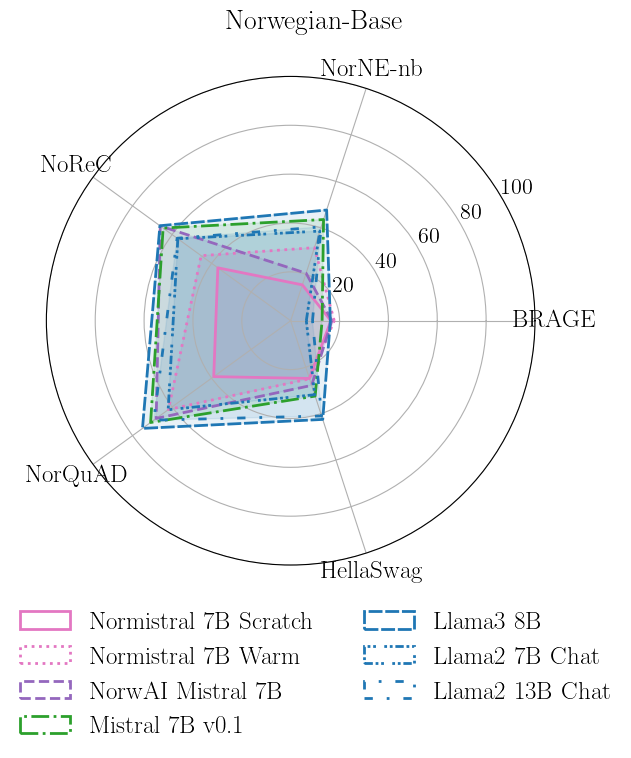

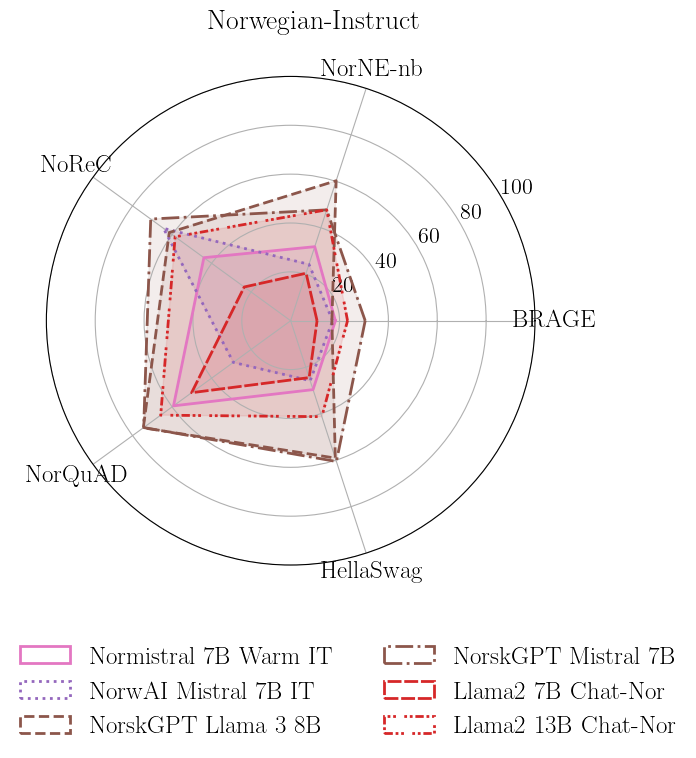

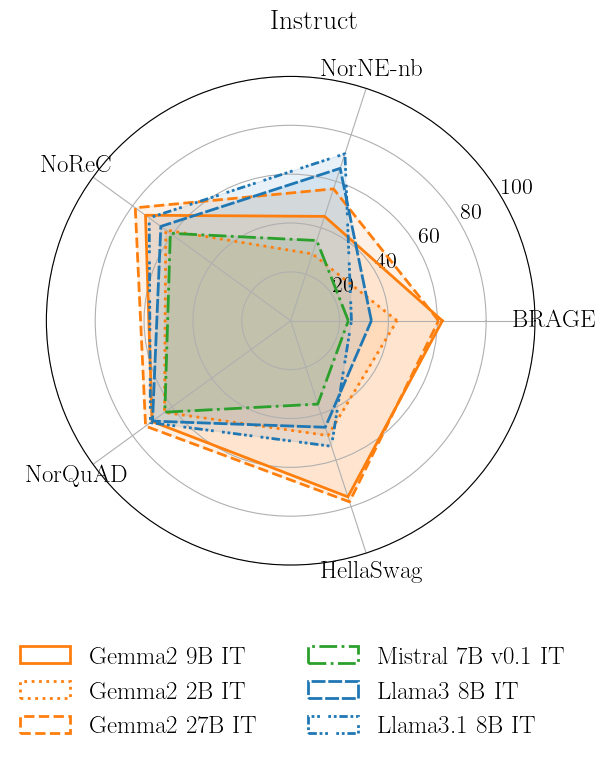

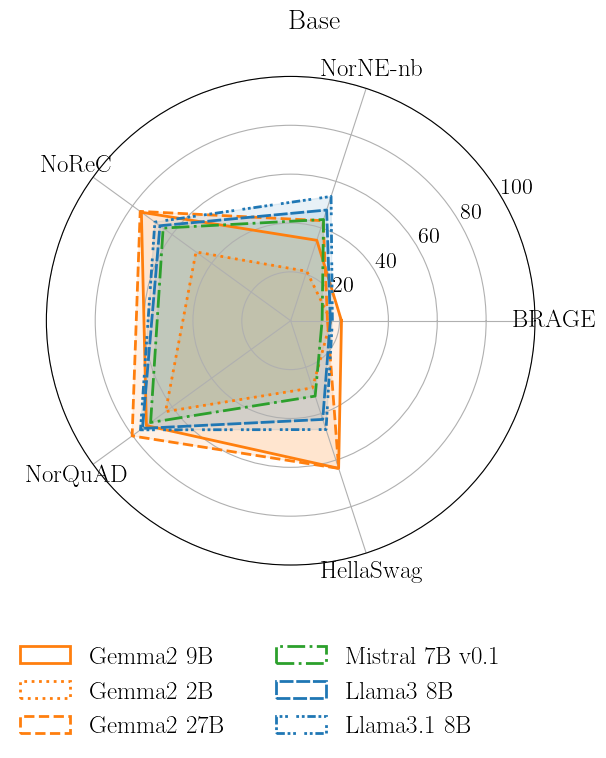

In [13]:
from consts import dataset_name_map, model_map
import util
import os

spider_models = {
    "norwegian-base": [
        # "google/gemma-2-9b",
        "norallm/normistral-7b-scratch",
        "norallm/normistral-7b-warm", 
        "NorwAI/NorwAI-Mistral-7B",
        "mistralai/Mistral-7B-v0.1",
        "meta-llama/Meta-Llama-3-8B",
        "meta-llama/Llama-2-7b-chat-hf",
        "meta-llama/Llama-2-13b-chat-hf",
    ],
    "norwegian-instruct": [
        # "google/gemma-2-9b-it",
        "norallm/normistral-7b-warm-instruct",
        "NorwAI/NorwAI-Mistral-7B-instruct",
        "bineric/NorskGPT-Llama3-8b",
        "bineric/NorskGPT-Mistral-7b",
        "RuterNorway/Llama-2-7b-chat-norwegian",
        "RuterNorway/Llama-2-13b-chat-norwegian",
    ],
    "instruct": [
        "google/gemma-2-9b-it",
        "google/gemma-2-2b-it",
        "google/gemma-2-27b-it",
        "mistralai/Mistral-7B-Instruct-v0.1",
        # "meta-llama/Llama-2-7b-chat-hf",
        # "meta-llama/Llama-2-13b-chat-hf",
        "meta-llama/Meta-Llama-3-8B-Instruct",
        "meta-llama/Meta-Llama-3.1-8B-Instruct",
    ],
    "base": [
        "google/gemma-2-9b",
        "google/gemma-2-2b",
        "google/gemma-2-27b",
        "mistralai/Mistral-7B-v0.1",
        "meta-llama/Meta-Llama-3-8B",
        "meta-llama/Meta-Llama-3.1-8B",
    ]
}

line_styles = {
    # "norwegian": ["solid", "dotted", "dashed", "dashdot", "densely dotted"],
    "norwegian": ["solid", "dotted", "dashed", "dashdot", (0, (5, 1)), (0, (3, 1, 1, 1, 1)), "densely dotted", "densely dashed"],
    "instruct": ["solid", "dotted", "dashed", "dashdot", (0, (5, 1)), (0, (3, 1, 1, 1, 1))],
    # "instruct": ["solid", "dotted", "dashed"]
}
line_style = ["solid", "dotted", "dashed", "dashdot", (0, (5, 1)), (0, (3, 1, 1, 1, 1)), (0, (3, 5, 1, 5)), (5, (10, 3))]

# which_metrics = [c for c in sdval.columns if "model" not in c]
for key, models in spider_models.items():
    print(models)
    # print(which_metrics)
    util.spider_plot(stats, models, which_metrics=which_metrics, linestyles=line_style, title=key)
    plt.savefig(f"radar_chart.pgf", bbox_inches='tight')
    os.rename("radar_chart.pgf", f"FIGURES/radar_chart_{key}.tex")
    # break

# util.spider_plot(sdvals, spider_models["instruct"], which_metrics=metric_columns, linestyles=line_style)
# plt.savefig("FIGURES/radar_chart_eng.pgf", bbox_inches='tight')

# util.spider_plot(sdvals, spider_models["norwegian"], which_metrics=metric_columns, linestyles=line_style)
# plt.savefig("FIGURES/radar_chart_nor.pgf", bbox_inches='tight')